<h2>Load data</h2>

In [1]:
from numpy import loadtxt

# load data
import pandas as pd
df = pd.read_csv('data/circle.csv')
np_data = df.values

# split data into X and y
X = np_data[:,0:-1]
Y = np_data[:,-1]

# set seed to randomizer
seed = 7

# Show min, max and range of attributes
attr_min = X.min(0)
attr_max = X.max(0)
attr_range = attr_max - attr_min
print(attr_min)
print(attr_max)
print(attr_range)

[-0.99 -1.  ]
[0.98 1.  ]
[1.97 2.  ]


<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    # calculate accuracy
    accuracy = accuracy_score(Y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Y, predictions)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)

<h2>Functions for visualizing decision borders</h2>

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Generates a matrix which classifiers all values from -1 to +1, for both x0 and x1
def pred_matrix():
    # 200x200 matrix (step=0.01)
    shape = (200, 200)
    # fill with zeros
    pm = np.zeros(shape)
    for r in range(shape[0]):
        for c in range(shape[1]):
            # rearrange to attribute values
            x0 = c/100-1
            x1 = r/100-1
            cy = ([[x0,x1]])
            # predict instance
            pm[r,c] = model.predict(cy)
    return pm

# Generates a plot of the labels and decision borders
def show_decision_borders(model):
    # train model on training data
    model.fit(X, Y)
    # generation prediction matrix
    pm = pred_matrix()
    
    # figure settings
    custom_cmap = ListedColormap(['#ffdbc2','#c2dbff','#c2ffdb'])
    extent = -1, 1, 1, -1
    
    # Display matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(pm, cmap=custom_cmap, extent=extent)
    plt.plot(X[Y==0, 0], X[Y==0, 1], "o", label="0", markerfacecolor='#cc6600', color="#000000")
    plt.plot(X[Y==1, 0], X[Y==1, 1], "o", label="1", markerfacecolor="#0066cc", color="#000000")
    plt.plot(X[Y==2, 0], X[Y==2, 1], "o", label="2", markerfacecolor="#66cc00", color="#000000")
    plt.show()

<h2>Linear classifier</h2>

-- Training data --
Accuracy: 68.60%
Confusion Matrix:
[[  0  81]
 [  0 177]]

-- 10-fold CV --
Average accuracy: 68.60%
Confusion Matrix:
[[  0  81]
 [  0 177]]


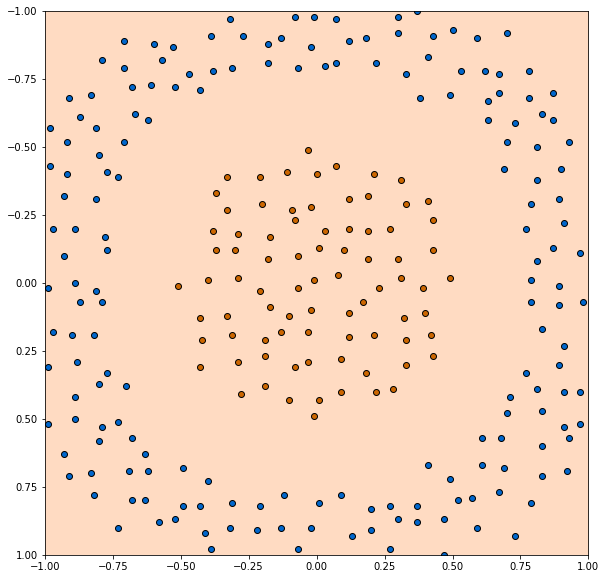

In [4]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=1000, random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model)

<h2>Neural Network classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]

-- 10-fold CV --
Average accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]


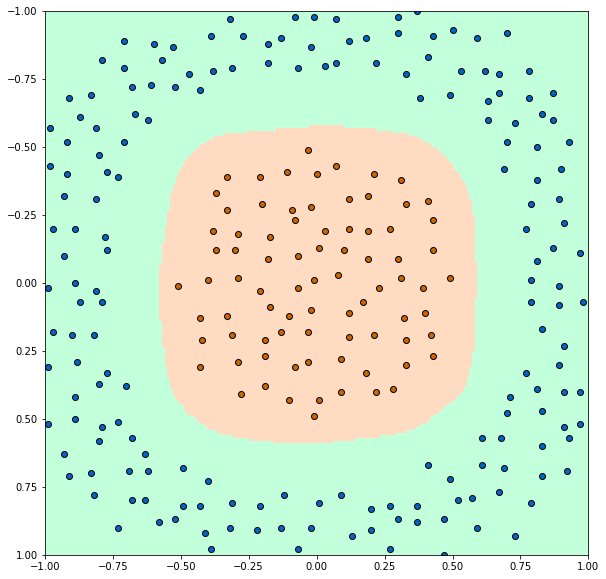

In [5]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=2000, random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model)

<h2>Decision Tree classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]

-- 10-fold CV --
Average accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]


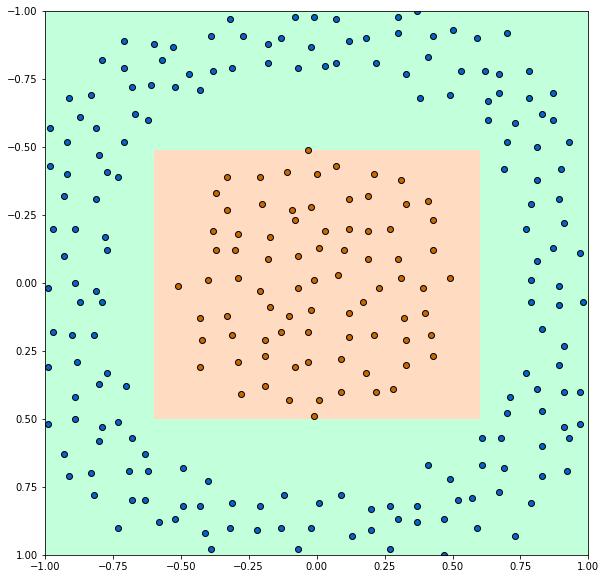

In [6]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model)

<h2>SVM classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]

-- 10-fold CV --
Average accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]


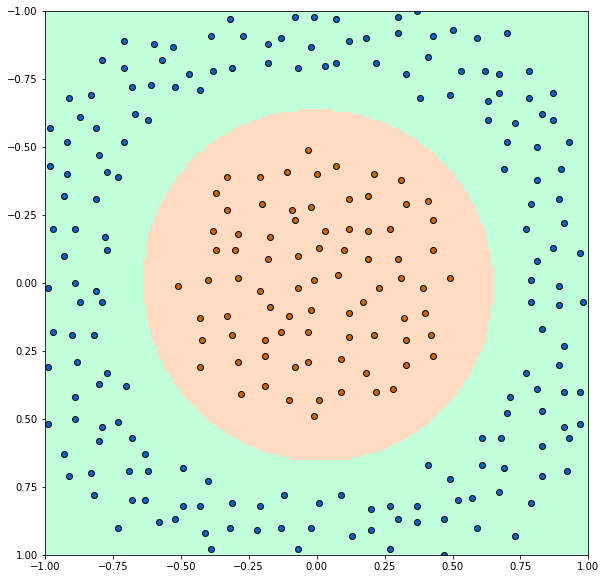

In [7]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model)

<h2>kNN classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]

-- 10-fold CV --
Average accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]


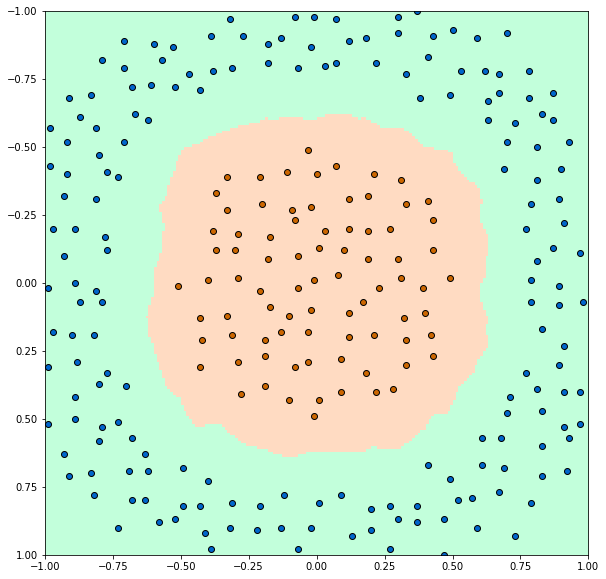

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=3)
evaluate(model)

# visualize decision borders
show_decision_borders(model)

<h2>XGBoost classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 81   0]
 [  0 177]]

-- 10-fold CV --
Average accuracy: 93.02%
Confusion Matrix:
[[ 63  18]
 [  0 177]]


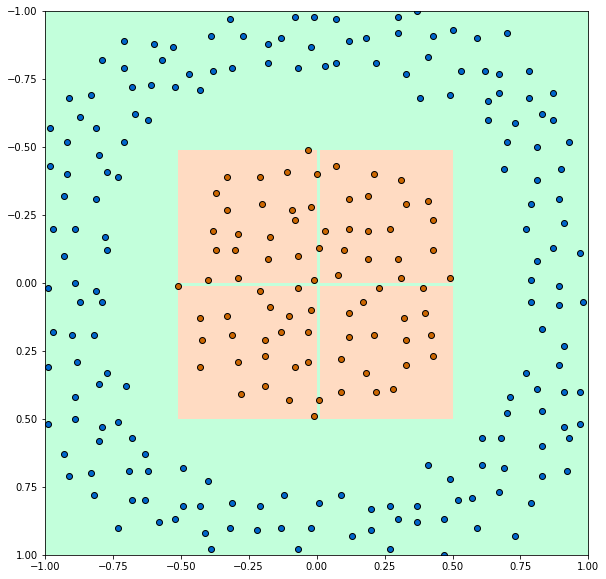

In [9]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model)

<h2>Plot attributes</h2>

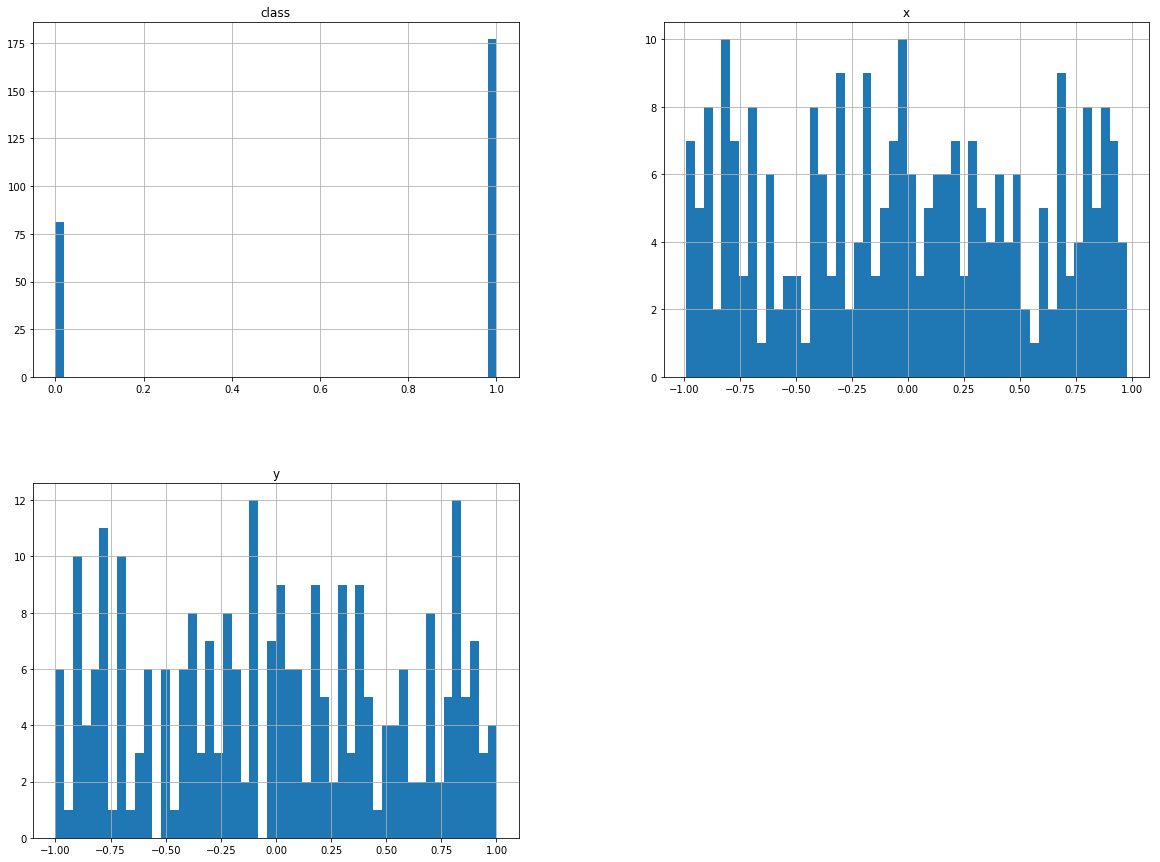

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()